In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import numpy as np
import matplotlib.pyplot as plt


**Problem A: Modify and rerun the model**
1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., M2). Use the following parameters:

*  M1^0 = 1100.0
*  M2^0 = 300.0
*  k12 = 0.0003
*  k21 = 0.1

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for t = 100 years with a daily time step (i.e., dt = 1/365).
3. Use the print() command to print out the value of M1 and M2 at the end of the simulation.

In [124]:
M1i = 1100.0 # mass of carbon in the atmosphere [GtC]
M2i = 300.0 # mass of carbon in the biosphere [GtC]

k12 = 0.0003 #turnover time
k21 = 0.1 #turnover time

ti = 0.0 #starting at year 0
tf = 100.0 #ending at year 100
dt = 1/365 #daily time step

In [125]:

t = np.arange(ti,tf+dt,dt)#creating an array from 0th year to the 100th year with a unit day increment

Nt = t.size #gives us the size of an array

print('t has '+str(Nt)+' time steps')

t has 36501 time steps


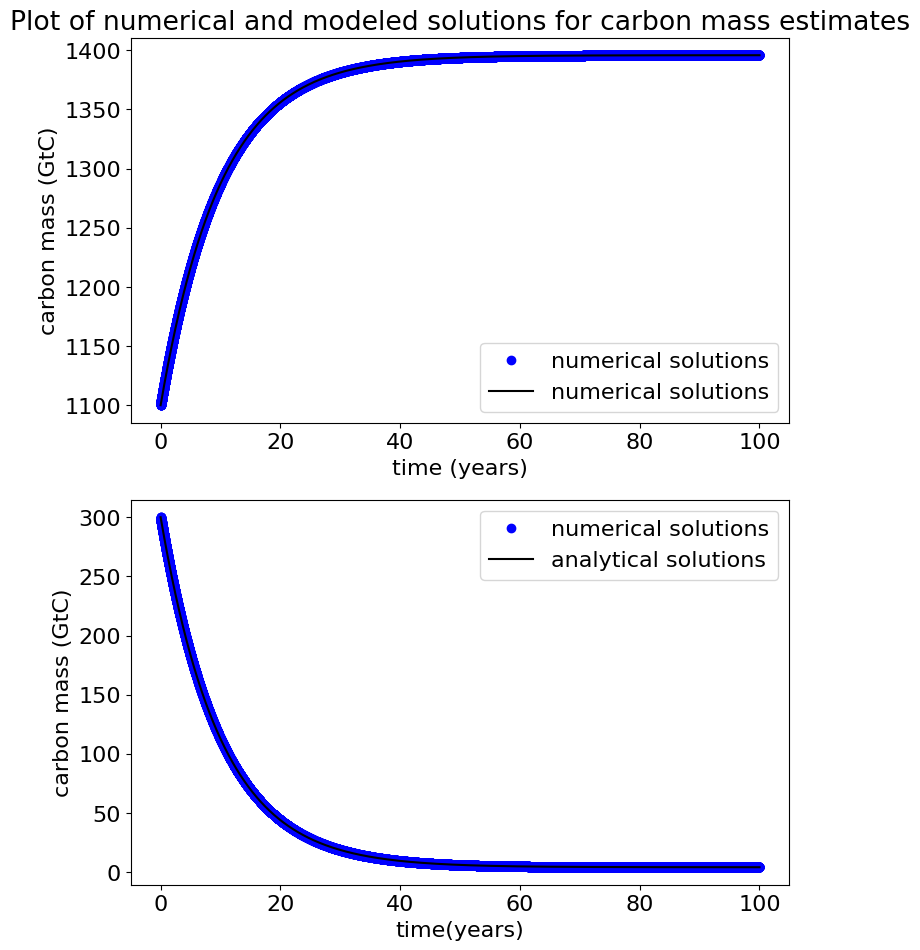

In [126]:
M1 = np.zeros((Nt,)) #creating an array of zeros of size 'Nt' to store the calculated values for atmossphere
M2 = np.zeros((Nt,)) #creating an array of zeros of size 'Nt' to store the calculated values for biosphere

for i in np.arange(Nt): #until the range runs out
    if (i==0):

        M1[i] = M1i #specifing initial condition
        M2[i] = M2i #specifing initial condition

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] #based on turnover time, calculates the output from the biosphere
        dM2dt = k12*M1[i-1] - k21*M2[i-1] #based on turnover time, calculates the output from the atmosphere

        M1[i] = M1[i-1] + dM1dt*dt #output from the biosphere added to the subsequent years to get the total carbon mass for atmosphere
        M2[i] = M2[i-1] + dM2dt*dt #output from the atmossphere added to the subsequent years to get the total carbon mass for biosphere



M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
Ma = M1[-1]
Mb = M2[-1]
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Plot of numerical and modeled solutions for carbon mass estimates')
plt.plot(t,M1,'bo',label='numerical solutions')
plt.plot(t,M1_anlt,'k-', label='numerical solutions')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='numerical solutions')
plt.plot(t,M2_anlt,'k-', label='analytical solutions')
plt.xlabel('time(years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()

plt.show()

In [127]:
print("The values of M1 and M2 at the end of the simulation are {:.2f} Gt and {:.2f} Gt respectively.".format(np.double(M1[-1]),np.double(M2[-1])))

The values of M1 and M2 at the end of the simulation are 1395.80 Gt and 4.20 Gt respectively.


**Problem B: Examine impacts of human emissions**

1. Load the anthropogenic emissions data for 1751-2008. Note that the data is in a comma separated variable file (named AnthropogenicEmissions.1751_2008.csv) with one header row.
2. Plot the anthropogenic emissions data. Starting from the initial conditions (M1^0 and M2^0) and corresponding to the final conditions noted in part A(3) above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:
* Mass of C in the atmosphere versus time
* Mass of C in the land versus time
* The change in mass of C in the atmosphere vs time
* The change in mass of C in the biosphere vs time
3. Use the print() command to print out the value of and at the end of the simulation in 2008.

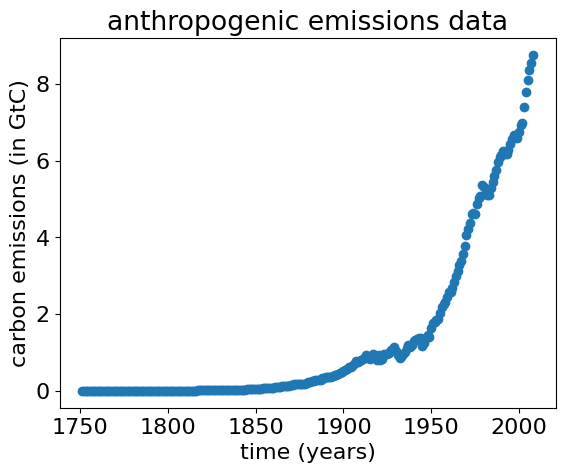

In [128]:
historical_emissions_file = '/content/drive/MyDrive/Fa2024-Modeling/mod2/AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
year = data[:,0]
M3 = data[:,1]

plt.scatter(year,M3)
plt.title('anthropogenic emissions data')
plt.xlabel('time (years)')
plt.ylabel('carbon emissions (in GtC)')
plt.show()

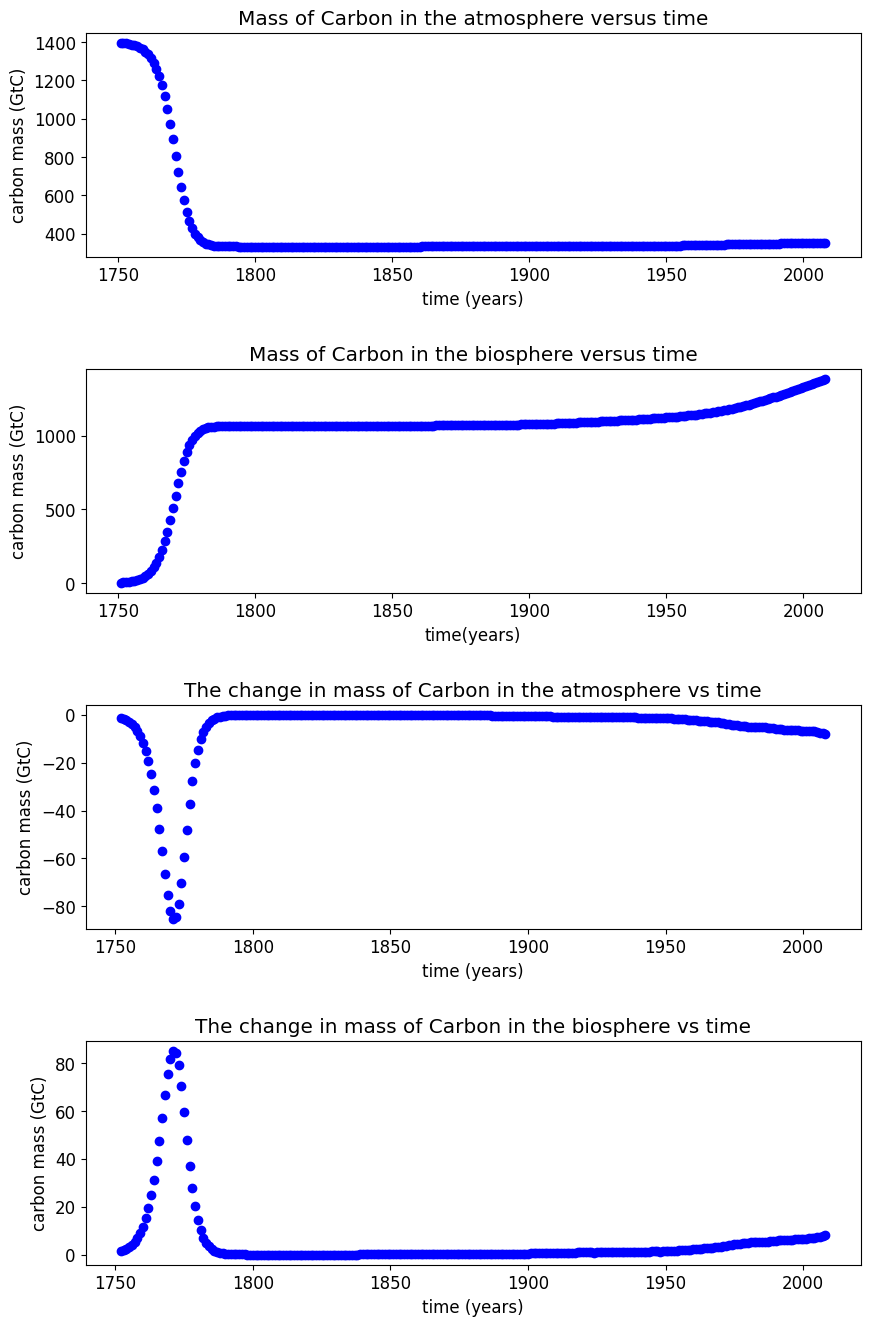

In [129]:
M1i = Ma # mass of carbon in the atmosphere [GtC]
M2i = Mb # mass of carbon in the biosphere [GtC]

years = year[-1] - year[0]
k12 = 0.0003 #turnover time
k21 = 0.1 #turnover time

ti = year[0] #starting at year 0
tf = year[-1] #ending at year 100
dt = 1 #daily time step

t = np.arange(ti,tf+dt,dt)#creating an array from 0th year to the 100th year with a unit day increment

Nt = t.size

dM1 = []; dM2 = [];
# cflux_t = np.interp(t, year, cflux)
# # Read this documentation to understand what this command does:
# #    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

# np.diff(M1)
# # Read this documentation to understand what this command does:
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html


M1 = np.zeros((Nt,)) #creating an array of zeros of size 'Nt' to store the calculated values for atmossphere
M2 = np.zeros((Nt,)) #creating an array of zeros of size 'Nt' to store the calculated values for biosphere

for i in np.arange(Nt): #until the range runs out
    if (i==0):

        M1[i] = M1i + M3[i] #specifing initial condition
        M2[i] = M2i #specifing initial condition

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] #based on turnover time, calculates the output from the biosphere
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] #based on turnover time, calculates the output from the atmosphere
        dM1.append(dM1dt); dM2.append(dM2dt)

        M1[i] = M1[i-1] + dM1dt*dt + M3[i-1]#output from the biosphere added to the subsequent years to get the total carbon mass for atmosphere
        M2[i] = M2[i-1] + dM2dt*dt #output from the atmosphere added to the subsequent years to get the total carbon mass for biosphere



# M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
# M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
Mc = M1[-1]
Md = M2[-1]

plt.figure(figsize=(10,16))
plt.rcParams.update({'font.size': 12})

plt.subplot(4,1,1)
plt.title('Mass of Carbon in the atmosphere versus time')
plt.plot(t,M1,'bo')
# plt.plot(t,M1_anlt,'k-', label='what is this #1b?')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')


plt.subplot(4,1,2)
plt.title('Mass of Carbon in the biosphere versus time')
plt.plot(t,M2,'bo')
# plt.plot(t,M2_anlt,'k-', label='what is this #2b?')
plt.xlabel('time(years)')
plt.ylabel('carbon mass (GtC)')


plt.subplot(4,1,3)
plt.title('The change in mass of Carbon in the atmosphere vs time')
plt.plot(t[1:],dM1,'bo')
# plt.plot(t,M1_anlt,'k-', label='what is this #1b?')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')


plt.subplot(4,1,4)
plt.title('The change in mass of Carbon in the biosphere vs time')
plt.plot(t[1:],dM2,'bo')
# plt.plot(t,M1_anlt,'k-', label='what is this #1b?')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')


plt.subplots_adjust(hspace=0.5)

plt.show()

In [130]:
print("The values of carbon in the atmosphere and biosphere at the end of the simulation are {:.2f} Gt and {:.2f} Gt respectively.".format(np.double(M1[-1]),np.double(M2[-1])))

The values of carbon in the atmosphere and biosphere at the end of the simulation are 353.31 Gt and 1384.71 Gt respectively.


**Problem C: Examine the effects of mitigation**

1. Load the alternative emission scenarios contained in the file .csv, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions (and M1^0 and M2^0) corresponding to the final conditions noted in part B(4) above, run the model three times, one for each scenario. Create the following plots:
* Mass of C in the atmosphere versus time (all three scenarios on one plot)
* Mass of C in the land versus time (all three scenarios on one plot)
* The change in mass of C in the atmosphere vs time
* The change in mass of C in the biosphere vs time

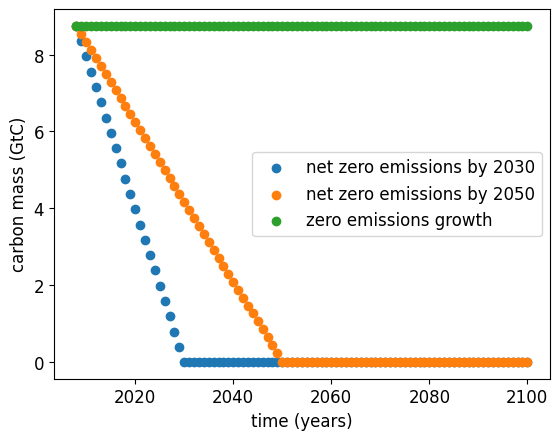

In [131]:
data = np.loadtxt('/content/drive/MyDrive/Fa2024-Modeling/mod2/EmissionsMitigationScenarios.2008_2100.csv',delimiter=',', skiprows=1)
year = data[:,0]
scenarios = 3;
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]
years = year[-1] - year[0]
legend_items = ['net zero emissions by 2030','net zero emissions by 2050','zero emissions growth']
plt.scatter(year,cflux_nz2030)
plt.scatter(year,cflux_nz2050)
plt.scatter(year,cflux_zeg)
plt.legend(legend_items)
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.show()

In [132]:
M1i = Mc # mass of carbon in the atmosphere [GtC]
M2i = Md # mass of carbon in the biosphere [GtC]

k12 = 0.0003 #turnover time
k21 = 0.1 #turnover time

ti = year[0] #starting at year 0
tf = year[-1] #ending at year 100
dt = 1 #yearly time step

t = np.arange(ti,tf+dt,dt)#creating an array from 0th year to the 100th year with a unit day increment

Nt = t.size

# dM1 = []; dM2 = [];


M1 = np.zeros((3,Nt)) #creating an array of zeros of size 'Nt' to store the calculated values for atmossphere
M2 = np.zeros((3,Nt)) #creating an array of zeros of size 'Nt' to store the calculated values for biosphere
dM1 = np.zeros((3,Nt));dM2 = np.zeros((3,Nt));

In [133]:

for k in np.arange(scenarios):
  cflux = data[:,k+1]

  for i in np.arange(Nt): #until the range runs out
      if (i==0):

          M1[k,i] = M1i + cflux[i]
          M2[k,i] = M2i #specifing initial condition
          dM1[k,i] = 0; dM2[k,i] = 0;

      else:
          dM1dt = k21*M2[k,i-1] - k12*M1[k,i-1]*M2[k,i-1] #based on turnover time, calculates the output from the biosphere
          dM2dt = k12*M1[k,i-1]*M2[k,i-1] - k21*M2[k,i-1] #based on turnover time, calculates the output from the atmosphere
          #  dM1.append(dM1dt); dM2.append(dM2dt)
          dM1[k,i] = dM1dt; dM2[k,i] = dM2dt;

          M1[k,i] = M1[k,i-1] + dM1dt*dt + cflux[i-1]#output from the atmosphere added to the subsequent years to get the total carbon mass for atmosphere
          M2[k,i] = M2[k,i-1] + dM2dt*dt #output from the biosphere added to the subsequent years to get the total carbon mass for biosphere
  # dM[k,:] = dM1;

          # plt.title('Mass of Carbon in the atmosphere versus time')
          # plt.plot(t,M1,label='carbon mass (observational)')
          # # plt.plot(t,M1_anlt,'k-', label='what is this #1b?')
          # plt.xlabel('time (years)')
          # plt.ylabel('carbon mass (GtC)')
          # plt.legend()



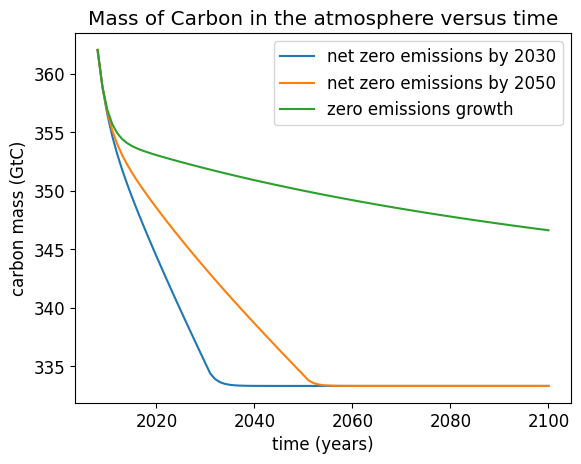

In [134]:
plt.title('Mass of Carbon in the atmosphere versus time')
plt.plot(t,M1[0,:],label='net zero emissions by 2030')
plt.plot(t,M1[1,:],label='net zero emissions by 2050')
plt.plot(t,M1[2,:],label='zero emissions growth')
# plt.plot(t,M1_anlt,'k-', label='what is this #1b?')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()


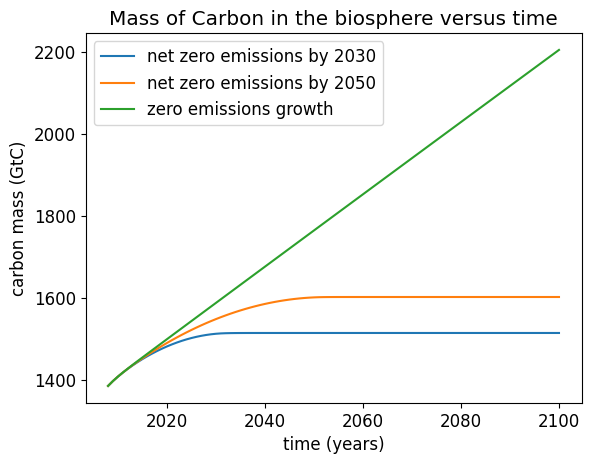

In [135]:
plt.title('Mass of Carbon in the biosphere versus time')
plt.plot(t,M2[0,:],label='net zero emissions by 2030')
plt.plot(t,M2[1,:],label='net zero emissions by 2050')
plt.plot(t,M2[2,:],label='zero emissions growth')
plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()
plt.show()

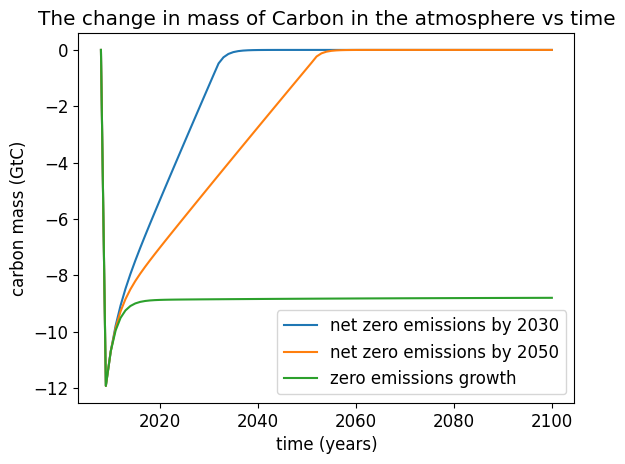

In [136]:
plt.title('The change in mass of Carbon in the atmosphere vs time')
plt.plot(t,dM1[0,:],label='net zero emissions by 2030')
plt.plot(t,dM1[1,:],label='net zero emissions by 2050')
plt.plot(t,dM1[2,:],label='zero emissions growth')

plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()



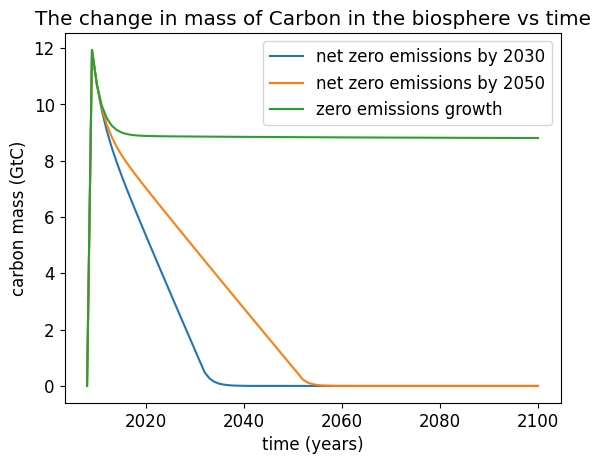

In [137]:
plt.title('The change in mass of Carbon in the biosphere vs time')
plt.plot(t,dM2[0,:],label='net zero emissions by 2030')
plt.plot(t,dM2[1,:],label='net zero emissions by 2050')
plt.plot(t,dM2[2,:],label='zero emissions growth')

plt.xlabel('time (years)')
plt.ylabel('carbon mass (GtC)')
plt.legend()